# Importing Libraries

---

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA4/S9
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/EVA4/S9
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-oe4_t_6m
All libraries are successfully installed!


In [0]:
import torch.nn as nn
import torch.optim as optim
from gradcam.visual import GradCAMView
import matplotlib.pyplot as plt
from result import plot_metric, save_and_show_result
from torchsummary import summary
from data import data
from display import display
from model import ResNet18

# Data Loading

---



In [34]:
trainset, testset, train_loader, test_loader, classes =data()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


#                          Image Albumentation

In [0]:
import numpy as np
from datatransforms import AlbumentationTransforms
import albumentations as A

channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations
train_transforms = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=4) # fillvalue is 0 after normalizing as mean is 0
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)


# Test Phase transformations
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])

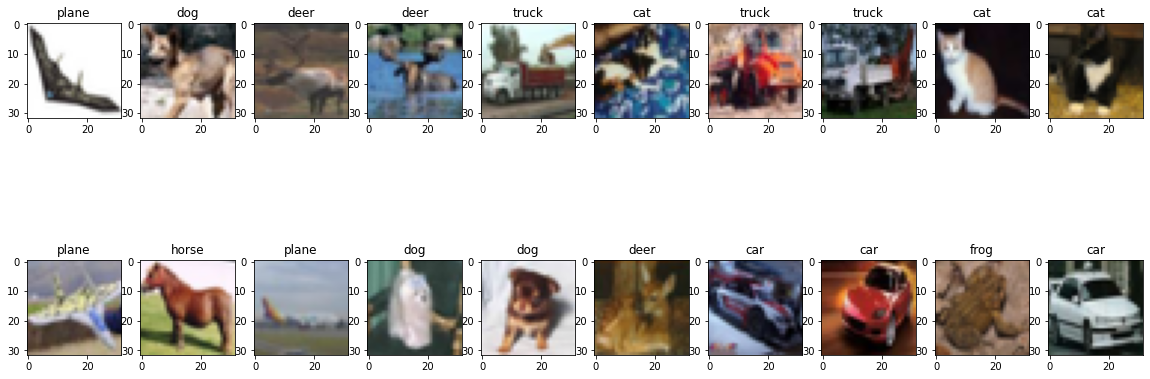

In [36]:
display(train_loader, classes)

# Importing ResNet Model and Model Summary

---



In [0]:
import model
net = model.ResNet18()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [38]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

# Training and Testing 

---



In [39]:
from callbacks import lr_scheduler
from evaluate import val
lr_step_size=25
lr_gamma=0.1
scheduler = lr_scheduler(optimizer,lr_step_size, lr_gamma)
losses = []
accuracies = []
correct_samples = []
incorrect_samples = []
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model,device,train_loader, optimizer, epoch, criterion)
   # scheduler.step()
    scheduler.step()
    val(
        net, test_loader, device, criterion, losses, accuracies,
        correct_samples, incorrect_samples, sample_count=25, last_epoch=EPOCHS
       )
    #test(model, device, test_loader)

    

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.9288678169250488 Batch_id=781 Accuracy=49.52: 100%|██████████| 782/782 [00:57<00:00, 13.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0170, Accuracy: 6129/10000 (61.29%)

EPOCH: 1


Loss=1.1744534969329834 Batch_id=781 Accuracy=68.81: 100%|██████████| 782/782 [00:57<00:00, 13.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 6985/10000 (69.85%)

EPOCH: 2


Loss=0.7551378011703491 Batch_id=781 Accuracy=78.19: 100%|██████████| 782/782 [00:58<00:00, 13.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0121, Accuracy: 7333/10000 (73.33%)

EPOCH: 3


Loss=0.48035237193107605 Batch_id=781 Accuracy=84.67: 100%|██████████| 782/782 [00:58<00:00, 13.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 7227/10000 (72.27%)

EPOCH: 4


Loss=0.5220105648040771 Batch_id=781 Accuracy=90.18: 100%|██████████| 782/782 [00:58<00:00, 13.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0125, Accuracy: 7517/10000 (75.17%)

EPOCH: 5


Loss=0.477775901556015 Batch_id=781 Accuracy=94.66: 100%|██████████| 782/782 [00:58<00:00, 13.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0129, Accuracy: 7638/10000 (76.38%)

EPOCH: 6


Loss=0.23241761326789856 Batch_id=781 Accuracy=96.76: 100%|██████████| 782/782 [00:58<00:00, 13.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0172, Accuracy: 7244/10000 (72.44%)

EPOCH: 7


Loss=0.3017970621585846 Batch_id=781 Accuracy=97.85: 100%|██████████| 782/782 [00:58<00:00, 13.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0141, Accuracy: 7730/10000 (77.30%)

EPOCH: 8


Loss=0.22046184539794922 Batch_id=781 Accuracy=98.71: 100%|██████████| 782/782 [00:58<00:00, 13.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0142, Accuracy: 7733/10000 (77.33%)

EPOCH: 9


Loss=0.21071460843086243 Batch_id=781 Accuracy=99.03: 100%|██████████| 782/782 [00:58<00:00, 13.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0145, Accuracy: 7733/10000 (77.33%)

EPOCH: 10


Loss=0.005993574857711792 Batch_id=781 Accuracy=99.11: 100%|██████████| 782/782 [00:58<00:00, 13.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0141, Accuracy: 7823/10000 (78.23%)

EPOCH: 11


Loss=0.02859276533126831 Batch_id=781 Accuracy=99.68: 100%|██████████| 782/782 [00:59<00:00, 13.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 7955/10000 (79.55%)

EPOCH: 12


Loss=0.04840594530105591 Batch_id=781 Accuracy=99.90: 100%|██████████| 782/782 [00:59<00:00, 13.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 7942/10000 (79.42%)

EPOCH: 13


Loss=0.03965407609939575 Batch_id=781 Accuracy=99.98: 100%|██████████| 782/782 [00:58<00:00, 13.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8017/10000 (80.17%)

EPOCH: 14


Loss=0.017199337482452393 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [00:58<00:00, 13.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0132, Accuracy: 8043/10000 (80.43%)

EPOCH: 15


Loss=0.005515366792678833 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:58<00:00, 13.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8034/10000 (80.34%)

EPOCH: 16


Loss=0.08188965916633606 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:59<00:00, 13.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8024/10000 (80.24%)

EPOCH: 17


Loss=0.001884758472442627 Batch_id=781 Accuracy=99.97: 100%|██████████| 782/782 [00:58<00:00, 13.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8025/10000 (80.25%)

EPOCH: 18


Loss=0.005642712116241455 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8036/10000 (80.36%)

EPOCH: 19


Loss=0.0008824467658996582 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [00:58<00:00, 13.36it/s]



Validation set: Average loss: 0.0138, Accuracy: 8052/10000 (80.52%)



 
 # Image GRADCAM on randomly chosen correct samples


---




Mode set to GradCAM.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


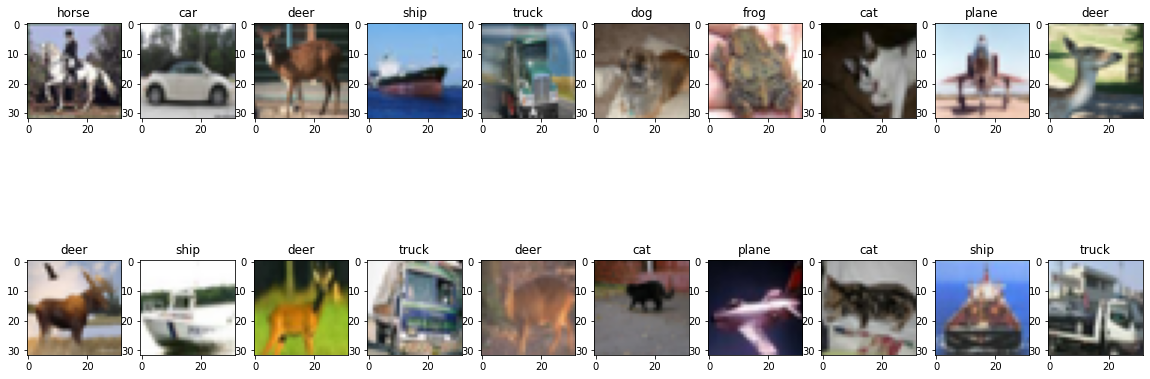

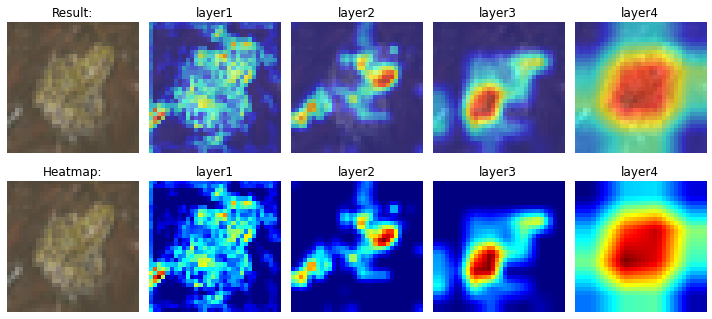

<Figure size 432x288 with 0 Axes>

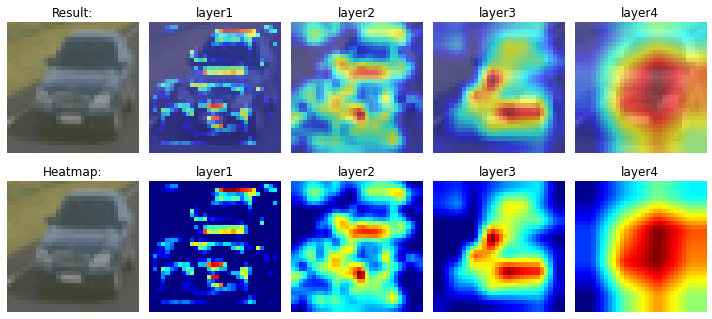

<Figure size 432x288 with 0 Axes>

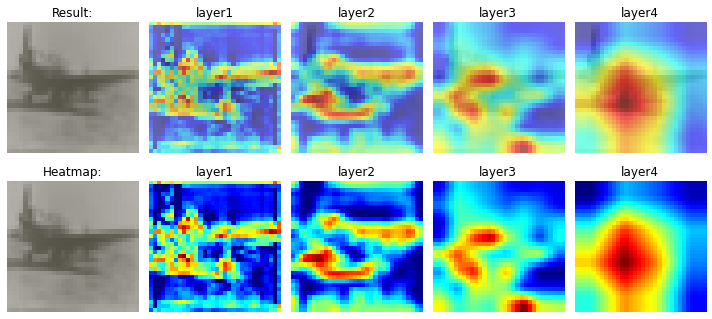

<Figure size 432x288 with 0 Axes>

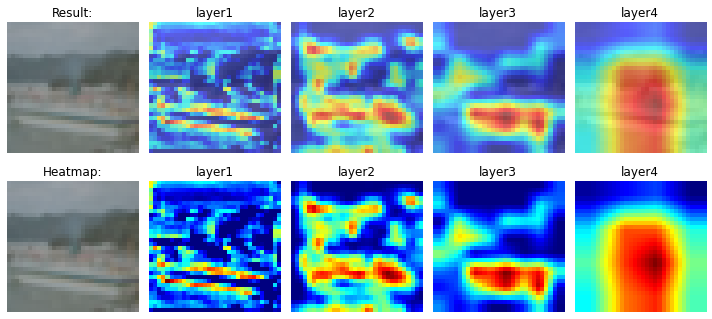

<Figure size 432x288 with 0 Axes>

In [40]:
import random
display(test_loader, classes)
mean=channel_means
std=channel_stdevs
grad_cam = GradCAMView(
    net, ['layer1', 'layer2', 'layer3', 'layer4'],
    device, mean, std
)

images = [x['image'] for x in random.sample(correct_samples, 4)]
grad_cam(images, 'grad_cam')